In [1]:
## Preamble / required packages
import numpy as np
np.random.seed(0)

## Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

import warnings
## Comment this out to activate warnings
warnings.filterwarnings('ignore')


plt.style.use("dark_background")

## Some architectures to know

+ Most neural networks are elaborate combinations of multiplications of trainable matrices and fixed nonlinear functions
+ Common examples: convolutional neural networks (trainable convolutional kernels), recurrent neural networks (trainable transition matrices for sequential data), and residual networks (matrix multiplications with "skip" connections)
+ Autoencoders: unsupervised learning

## Convolutional neural networks

+ Early layers perform discrete convolutions with the inputs
+ Data where features have an implicit metric (spatial lattices, time series, etc)

+ Convolutions usually preserve the dimensionality of the "long" feature directions (image sizes, time series lengths, etc), but change the dimensionality of the "short" feature directions (number of channels, number of features, etc)
+ Usually convolutions are followed by "pooling" operations, which seek to group together groups of adjacent features (like nearby pixels)
+ Later layers perform matrix multiplications with the outputs of the convolutional layers (similar to a multilayer perceptron)
+ Can be generalized to data on graphs (graph convolutional networks)

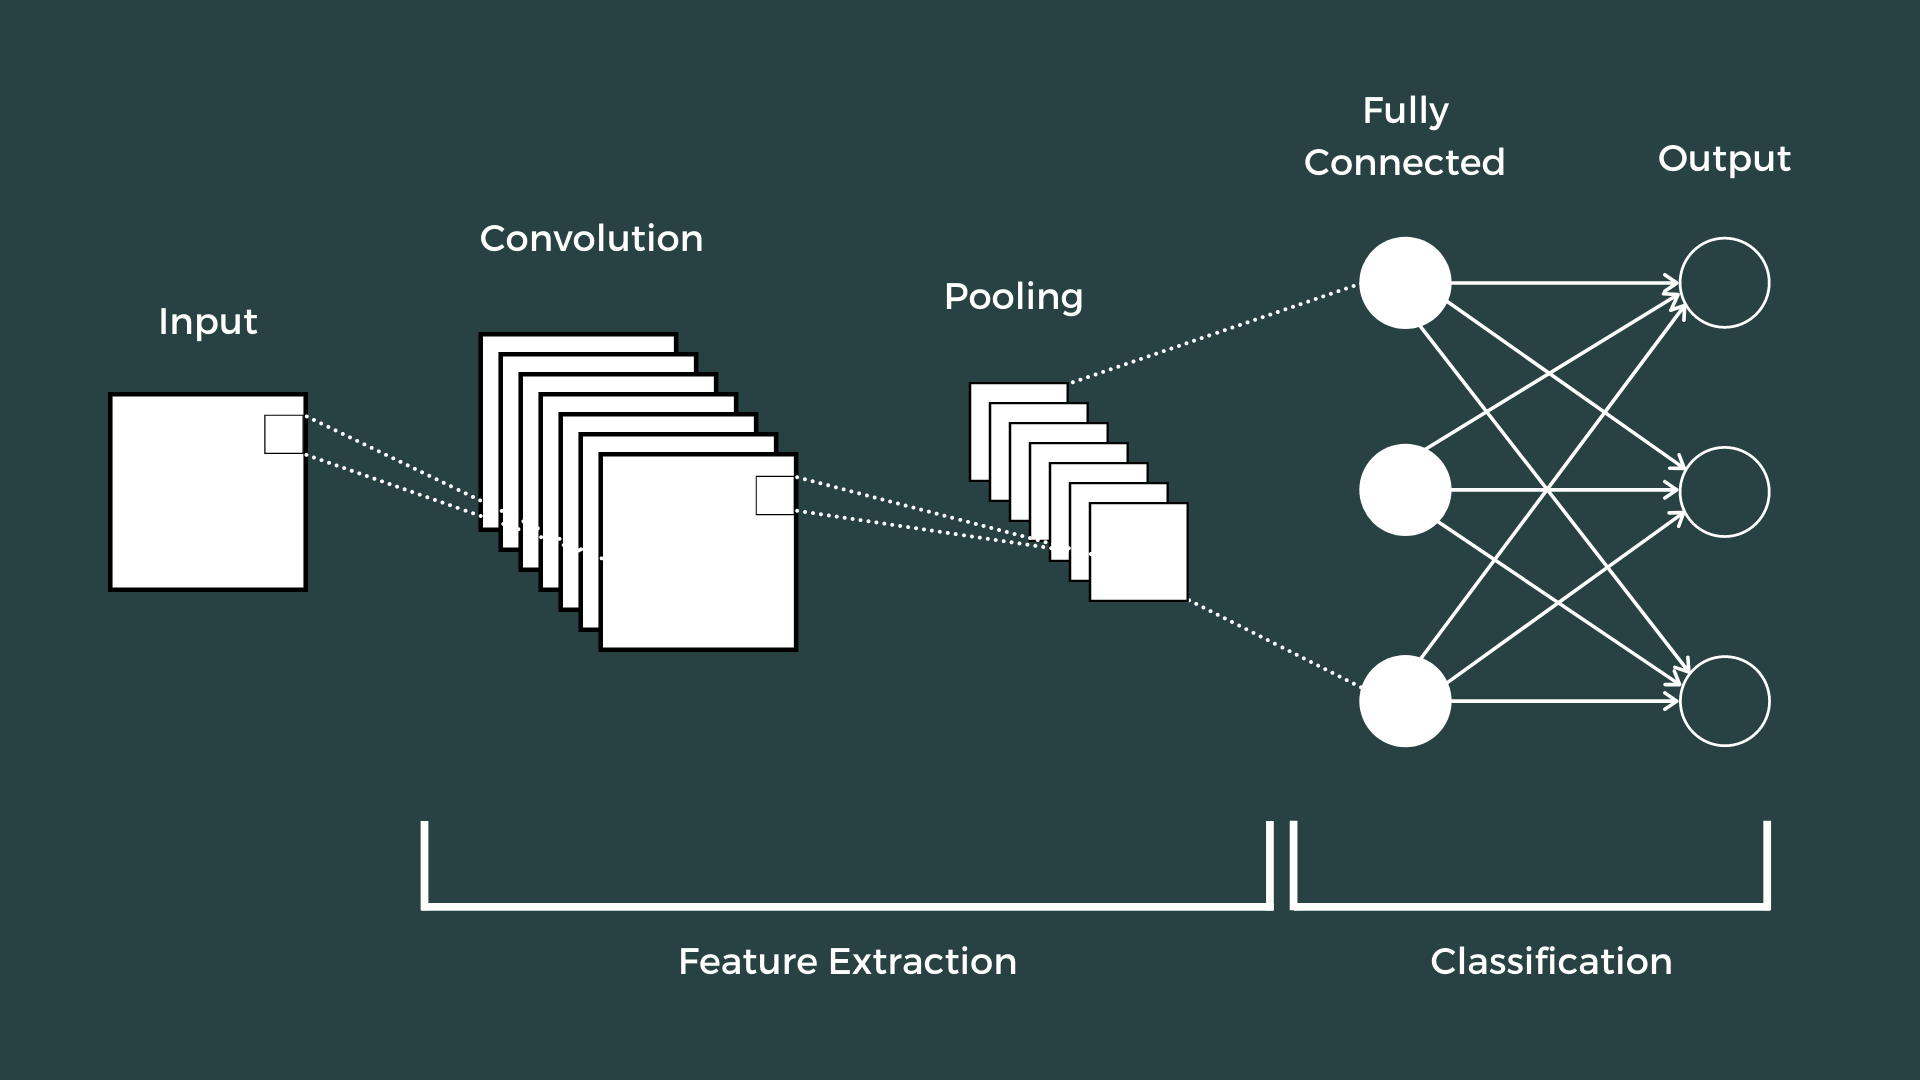

In [111]:
Image('../resources/cnn.png', width=700)
# https://www.theclickreader.com/introduction-to-convolutional-neural-networks/

In [151]:
## We are not training our models; these have random weights

class MultilayerPercepton:

    def __init__(self, input_shape, output_shape, hidden_shapes=[100, 100]):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.hidden_shapes = hidden_shapes
        self.layers = []
        for i, shape in enumerate(hidden_shapes):
            print(f"Hidden {i + 1} shape: ", (shape, input_shape))
            self.layers.append(np.random.randn(shape, input_shape))
            input_shape = shape
        print(f"Hidden {i + 2} shape: ", (output_shape, input_shape))
        self.layers.append(np.random.randn(output_shape, input_shape))

    def _sigma(self, x):
        """
        A tanh nonlinear activation function used in the neural network.
        """
        return np.tanh(x)

    def forward(self, x):
        for layer in self.layers:
            x = self._sigma(np.dot(layer, x))
        return x

            
model = MultilayerPercepton(X_train[0].shape[-1], 10, hidden_shapes=[100, 100])

model.forward(X_train[0])
    

# model = ConvolutionalNeuralNetwork(X_train[0].shape[-1], 10)
# model.forward(X_train[0])

Hidden 1 shape:  (100, 16129)
Hidden 2 shape:  (100, 100)
Hidden 3 shape:  (10, 100)


array([ 0.99999749, -0.99999325,  0.99999989, -1.        ,  0.99999883,
       -0.99999989,  0.98597472,  0.99999442, -0.83051971, -0.96260677])

In [150]:
class ConvolutionalNeuralNetwork:
    """
    A convolutional neural network with 1 convolutional layer, 1 pooling layer, and 
    arbitrary hidden layers.
    """

    def __init__(self, input_shape, output_shape, pool_size=10, hidden_shapes=[100, 100]):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.hidden_shapes = hidden_shapes
        self.pool_size = pool_size

        self.kernel = np.random.randn(3,)
        print(f"Conv1 shape: ", self.kernel.shape)
        input_shape = (input_shape - self.kernel.shape[-1] + 1) // self.pool_size
        
        self.layers = []
        for i, shape in enumerate(hidden_shapes):
            print(f"Hidden {i + 1} shape: ", (shape, input_shape))
            self.layers.append(np.random.randn(shape, input_shape))
            input_shape = shape
        print(f"Hidden {i + 2} shape: ", (output_shape, input_shape))
        self.layers.append(np.random.randn(output_shape, input_shape))

    def _sigma(self, x):
        """
        A ReLU nonlinear activation function used in the neural network.
        """
        out = x
        out[out < 0] = 0
        return out

    def forward(self, x):

        # Convolution
        x = self._sigma(np.convolve(x, self.kernel, mode='same'))

        # Max-Pooling
        # take the max value of each 3x1 block
        all_clumps = [x[i::self.pool_size] for i in range(self.pool_size)]
        min_len = min([len(clump) for clump in all_clumps])
        all_clumps = np.array([clump[:min_len] for clump in all_clumps])
        x = all_clumps.max(axis=0)

        for layer in self.layers:
            x = self._sigma(np.dot(layer, x))
        return x

model = ConvolutionalNeuralNetwork(X_train[0].shape[-1], 10, hidden_shapes=[100, 100])

model.forward(X_train[0])

Conv1 shape:  (3,)
Hidden 1 shape:  (100, 1612)
Hidden 2 shape:  (100, 100)
Hidden 3 shape:  (10, 100)


array([ 0.        ,  0.        ,  4.56541629, 13.13965446, 31.67753777,
        3.85837091, 34.57907483,  0.        ,  0.        ,  9.30646638])

## Residual networks

+ Residual networks are a special case of a neural network with skip connections
+ These skip connections make it a little easier to train deeper networks, but avoiding "vanishing gradients" an issue with gradient descent for deep networks
+ We'll discuss training DNNs in more detail later

$$
\mathbf{h}_t = \sigma(\mathbf{W}_t \mathbf{h}_{t-1} + \mathbf{x}_t)
$$

# Recurrent neural networks

+ Neural networks for sequential data (time series, text, etc)
+ Each layer is a function of the previous layer and the current input. The network has a trainable internal transition matrix, which is iterated several times. The state depends on the previous state and the current input

$$
\mathbf{h}_t = \sigma(\mathbf{W}_h \mathbf{h}_{t-1} + \mathbf{W}_x \mathbf{x}_t)
$$

$$
\mathbf{y}_t = \sigma(\mathbf{W}_y \mathbf{h}_t)
$$

Compare to a multilayer perceptron: takes a single input, propagates across several hidden layers with different weight matrices, and then returns a single output
$$
\mathbf{h}_t = \sigma(\mathbf{W}_t \mathbf{h}_{t-1})
$$

$$
\mathbf{y}_t = \mathbf{h}_t
$$


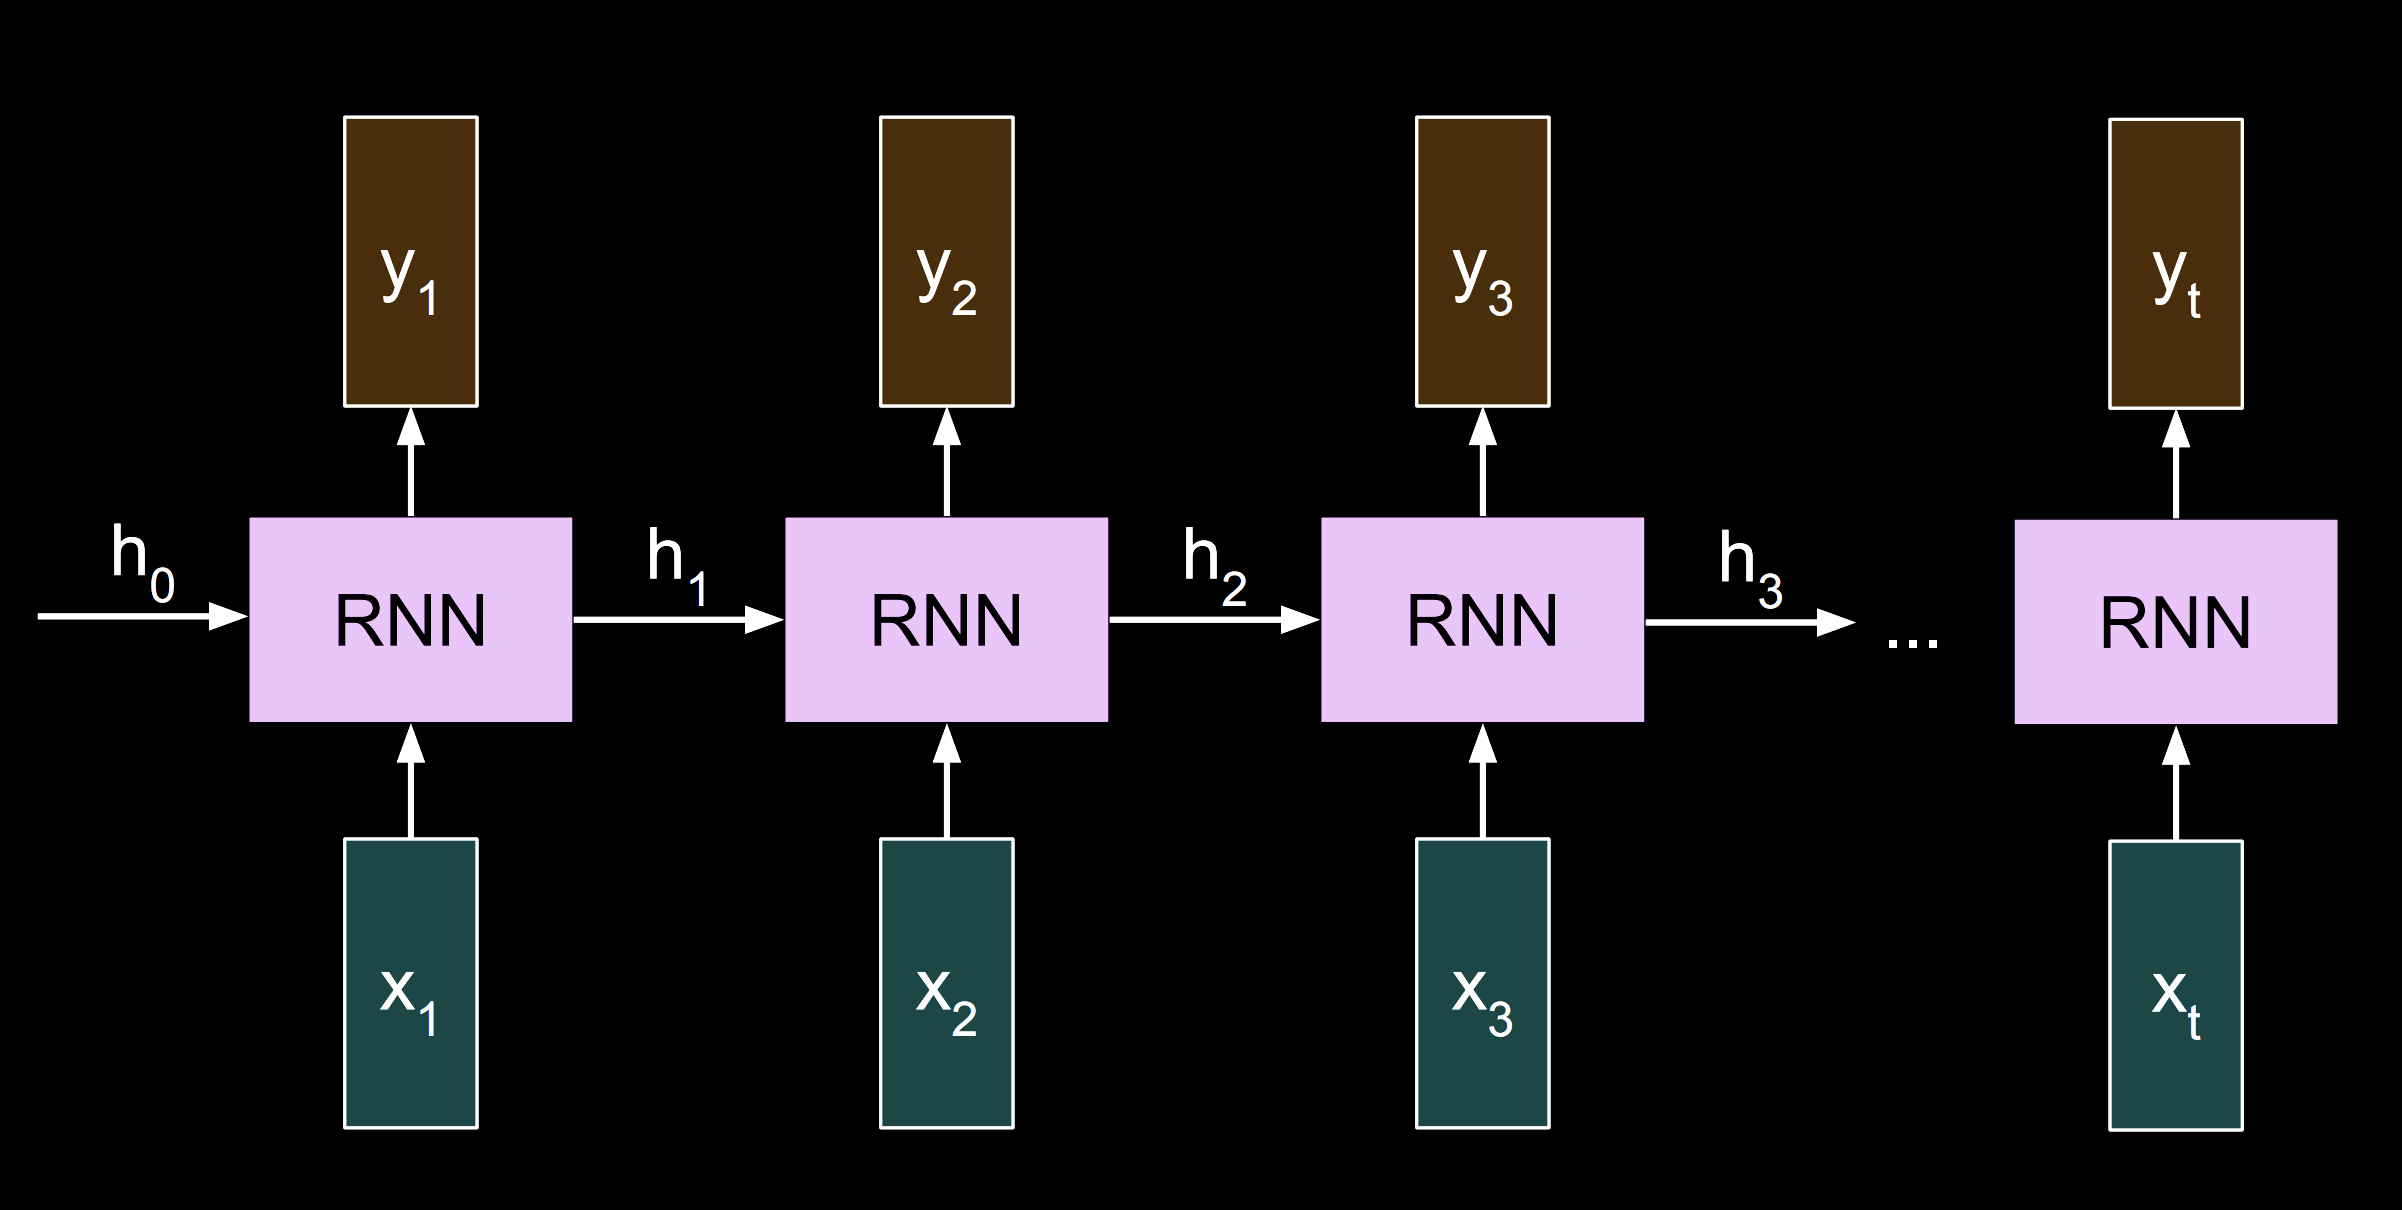

In [135]:
Image('../resources/rnn.png', width=700)
# http://cs231n.stanford.edu/slides/2021/lecture_10.pdf

# What else is out there?

+ *Anything* that takes a vector and returns a vector can be a neural network
+ The hard part is finding a way to train it, ideally using gradient descent

### Transformers

+ Replacing RNNs for large sequential datasets
+ Attention mechanism: each layer attends to a different part of the input

### Variational autoencoders (and generative models in general)

+ Input vectors are sampled from some unknonwn distribution
+ Learn a latent probability distribution, can sample the distribution to generate new datapoints similar to the training data

### Neural ODEs

+ Instead of having "Layers," train a continuous-time ODE that maps an input vector to an output vector

### Diffusion models

+ Generative models that assume that training data is sampled from some distribution
+ Simulate forward/backwards Kolmogorov equations to generate new datapoints

